In [ ]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import pack_vis_sol
import pack_dynamics
import copy
import time
import pack_ga
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)


local
stop final relax at some point


<Axes: >

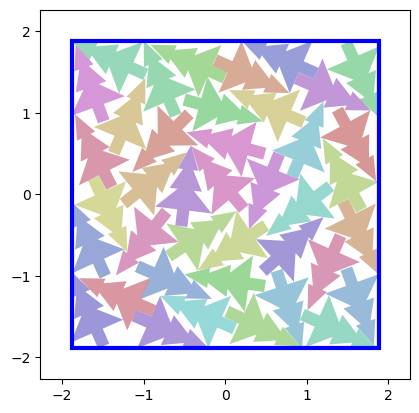

In [2]:
ga = kgs.dill_load(kgs.code_dir+'../../results/test_ga_result_ga.dill')
pop = ga.populations[0]
pop.select_ids([(np.argmin(pop.fitness))])
sol = pop.configuration
sol.xyt = sol.xyt.astype(kgs.dtype_cp)
sol.h = sol.h.astype(kgs.dtype_cp)
pack_vis_sol.pack_vis_sol(sol)

In [ ]:
solx = copy.deepcopy(sol)
solx.use_fixed_h = False
cost = copy.deepcopy(ga.fitness_cost)
#cost.costs[0].scaling*=0.1
cost_overlap = copy.deepcopy(cost)
cost_overlap.costs.pop(0)
optimizer = pack_dynamics.OptimizerBFGS()
optimizer.cost = copy.deepcopy(cost)
optimizer.n_iterations = 200
optimizer.max_step = 1e-4
optimizer.history_size = 10
optimizer.track_cost = False
optimizer.plot_cost = False
optimizer.use_line_search = True
print("Before optimization: ", cost.compute_cost_allocate(solx)[0].get().item(), cost_overlap.compute_cost_allocate(solx)[0].get().item(), solx.h[0,0])
for _ in range(10):
    optimizer.cost.costs[0].scaling*=0.5
    optimizer.max_step*=np.sqrt(0.5)
    solx = optimizer.run_simulation(solx)
    print("After optimization: ", cost.compute_cost_allocate(solx)[0].get().item(), cost_overlap.compute_cost_allocate(solx)[0].get().item(), solx.h[0,0])


Before optimization:  0.14238233329813943 0.0002533347362802725 3.7699999809265137
After optimization:  0.14225310905746907 0.00035549815794076733 3.766929928994277
After optimization:  0.14265625399377188 0.00011457985501683076 3.7754691647364176
After optimization:  0.14299392647714107 3.5681894254262965e-05 3.7809819436607577
After optimization:  0.14322615235485764 7.93938258816837e-06 3.784418224407412
After optimization:  0.1433372748698582 2.3867708233564377e-06 3.7859594305675657
After optimization:  0.14340470064297728 5.956055558843301e-07 3.7868734470196044
After optimization:  0.14343676587806273 2.1656114873619626e-07 3.787301800978026
After optimization:  0.14346268926846056 5.560163961347839e-08 3.7876461511976136
After optimization:  0.1434758731078082 1.3578856410200648e-08 3.787820739276765
After optimization:  0.143478318847232 9.562353436019927e-09 3.7878530764125284


In [25]:
import pack_io
import pack_metric
importlib.reload(pack_io)
importlib.reload(pack_metric)
pack_io.solution_list_to_dataframe([solx], compact=False)

ParticipantVisibleError: Overlapping trees in group 040

In [4]:
3.79**2/40

0.3591025